In [0]:

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("bitcoin_dataset.csv")

Saving bitcoin_dataset.csv to bitcoin_dataset (1).csv


In [0]:
#Get the number of rows and columns in the data set
df.shape

(43575, 7)

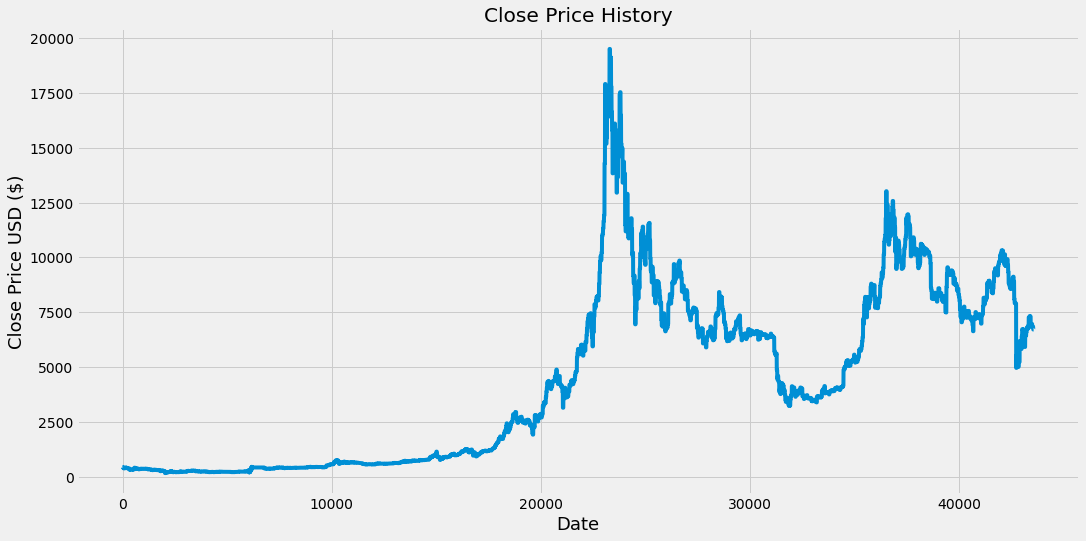

In [0]:
#Visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

34860

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01445348],
       [0.01445348],
       [0.01445348],
       ...,
       [0.33851114],
       [0.33851114],
       [0.33851114]])

In [0]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)

[array([0.01445348, 0.01445348, 0.01445348, 0.01445348, 0.01445348,
       0.01445348, 0.01445348, 0.01445348, 0.01445348, 0.01445348,
       0.01445348, 0.01445348, 0.01445348, 0.01445348, 0.01445348,
       0.01445348, 0.01445348, 0.01445348, 0.01445348, 0.01445348,
       0.01445348, 0.01445348, 0.01445348, 0.01445348, 0.01275083,
       0.01275083, 0.01275083, 0.01275083, 0.01275083, 0.01275083,
       0.01275083, 0.01275083, 0.01275083, 0.01275083, 0.01275083,
       0.01275083, 0.01275083, 0.01275083, 0.01275083, 0.01275083,
       0.01275083, 0.01275083, 0.01275083, 0.01275083, 0.01275083,
       0.01275083, 0.01275083, 0.01275083, 0.0112164 , 0.0112164 ,
       0.0112164 , 0.0112164 , 0.0112164 , 0.0112164 , 0.0112164 ,
       0.0112164 , 0.0112164 , 0.0112164 , 0.0112164 , 0.0112164 ])]
[0.011216401331371133]

[array([0.01445348, 0.01445348, 0.01445348, 0.01445348, 0.01445348,
       0.01445348, 0.01445348, 0.01445348, 0.01445348, 0.01445348,
       0.01445348, 0.01445348, 0.0

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(34800, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
34800/34800 [==============================] - 1321s 38ms/step - loss: 1.9779e-04


In [0]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)

In [0]:
predictions = scaler.inverse_transform(predictions)

In [0]:
# calculate Root mean square error ( RMSE )
rmse=np.sqrt(np.mean((np.square(predictions- y_test))))
print("Root mean squared error - ",rmse)

# calculate mean squared error ( RME )
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test, predictions)
print("Mean squared error - ",mean_squared_error)

# calculate mean absolute error ( RAE )
from sklearn.metrics import mean_absolute_error
mean_abs_error = mean_absolute_error(y_test, predictions)
print("Mean absolute error - ",mean_abs_error)

# calculate Root mean square error % ( RMSE  % )
rmse_percentage = np.sqrt(np.mean((np.square((y_test- predictions)/y_test))))*100
print("Rmse % - ", rmse_percentage, "%")

Root mean squared error -  80.34581551569256
Mean squared error -  6455.450070881705
Mean absolute error -  26.676779340228748
Rmse % -  1.051794259204493 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


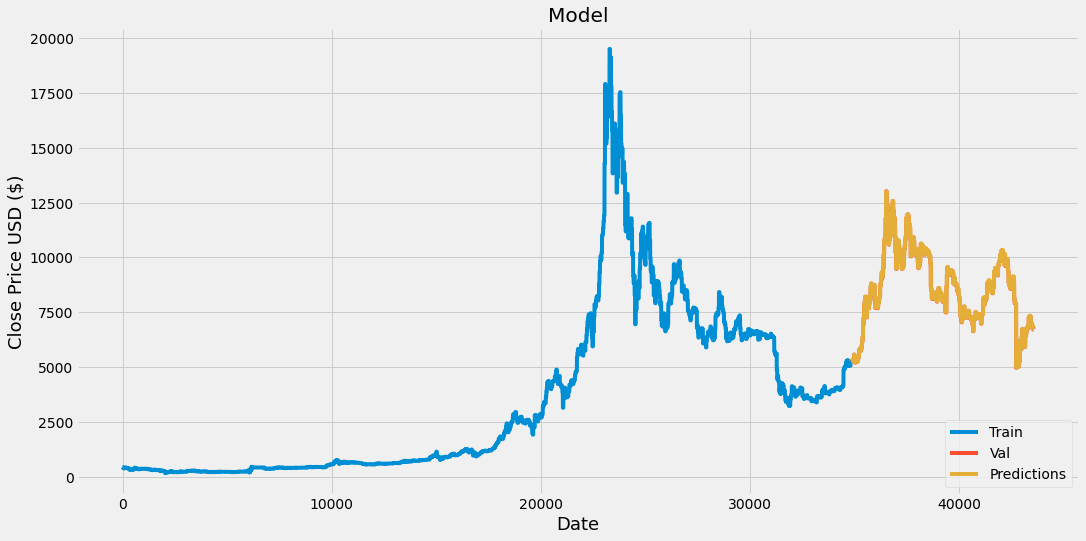

In [0]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted prices
valid

,Close,Predictions
34860,5251.937988,5246.323242
34861,5251.937988,5246.325684
34862,5298.385742,5246.326660
34863,5298.385742,5287.554688
34864,5298.385742,5291.501953
...,...,...
43570,6717.900391,6726.119629
43571,6717.900391,6726.083008
43572,6717.900391,6726.055176
43573,6717.900391,6726.033203


In [0]:
apple_quote = pd.read_csv("bitcoin_dataset.csv")
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[6730.2534]]


In [0]:
#Show predicted price of next day
apple_quote2 = pd.read_csv("bitcoin_dataset.csv")
print(apple_quote2['Close'])


0         457.334015
1         457.334015
2         457.334015
3         457.334015
4         457.334015
            ...     
43570    6717.900391
43571    6717.900391
43572    6717.900391
43573    6717.900391
43574    6717.900391
Name: Close, Length: 43575, dtype: float64


In [0]:
#Get the quote
apple_quote2 = pd.read_csv("bitcoin_dataset.csv")
print(apple_quote2['Close'])

0         457.334015
1         457.334015
2         457.334015
3         457.334015
4         457.334015
            ...     
43570    6717.900391
43571    6717.900391
43572    6717.900391
43573    6717.900391
43574    6717.900391
Name: Close, Length: 43575, dtype: float64
